<a href="https://colab.research.google.com/github/itssyoma/BigDataBaratov/blob/main/%D0%9B%D0%A02_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D1%8B_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2
# Тема: Обработка и анализ больших данных <br>
**Дисциплина:** «Обработка и анализ больших данных» <br>
**Выполнил:** Студент группы ПИЖ-б-о-22-1, направление подготовки: 09.03.04 «Программная инженерия»<br>
Баратов Семен Григорьевич

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly` и `altair`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn`, второй – с помощью `plotly` или `altair` на выбор студента.

# Данные


В папке [Data/lab2](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [ ]:
df = pd.read_csv('song_data.csv')
df.head()

num_cols = [
    'BPM','energy','danceability','happiness',
    'acousticness','instrumentalness','liveness','speechiness'
]

for c in num_cols:
    df[c] = df[c].replace(['-', '–', '—', ''], np.nan)  # на всякий случай разные прочерки
    df[c] = df[c].fillna(0)

# 2) loudness: оставить только число
df['loudness'] = (
    df['loudness']
    .astype(str)
    .str.replace('dB', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.strip()
    .replace(['nan', '-', '–', '—', ''], np.nan)
    .fillna(0)
)

# 3) привести к float
for c in num_cols + ['loudness']:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(float)

print(df[num_cols + ['loudness']].dtypes)
print("Пропусков в числовых столбцах:", df[num_cols + ['loudness']].isna().sum().sum())


BPM                 float64
energy              float64
danceability        float64
happiness           float64
acousticness        float64
instrumentalness    float64
liveness            float64
speechiness         float64
loudness            float64
dtype: object
Пропусков в числовых столбцах: 0


## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

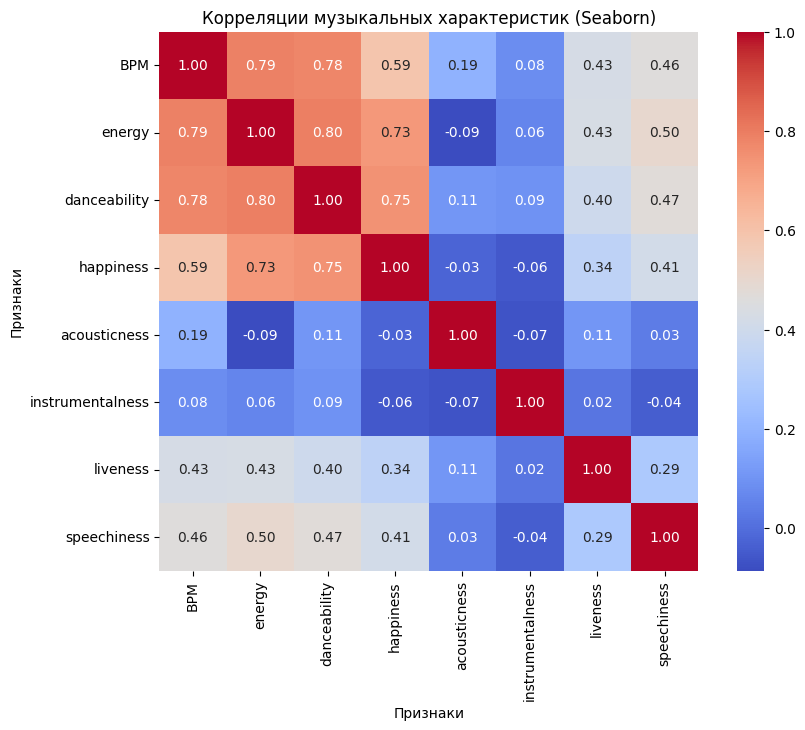

In [ ]:
features = [
    'BPM','energy','danceability','happiness',
    'acousticness','instrumentalness','liveness','speechiness'
]
corr = df[features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляции музыкальных характеристик (Seaborn)")
plt.xlabel("Признаки")
plt.ylabel("Признаки")
plt.show()

fig = px.imshow(
    corr,
    text_auto=".2f",
    aspect="auto",
    title="Корреляции музыкальных характеристик (Plotly)"
)
fig.update_layout(xaxis_title="Признаки", yaxis_title="Признаки")
fig.show()


## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



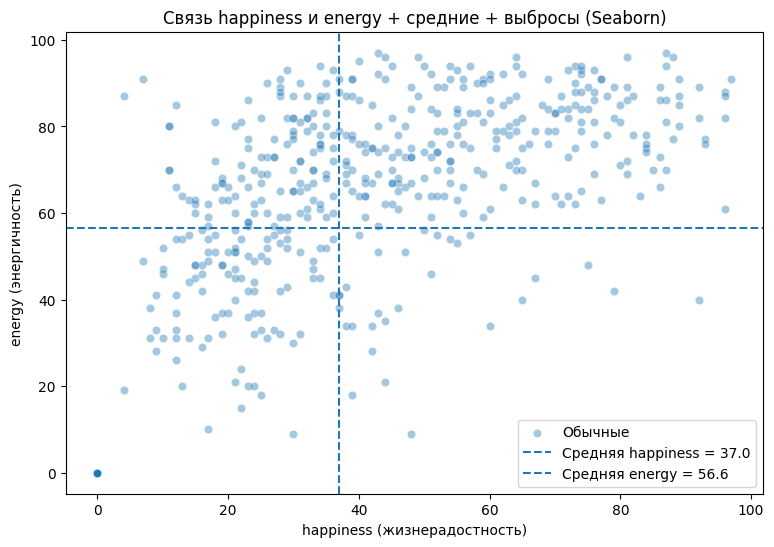

In [ ]:
x = df['happiness']
y = df['energy']

mean_x, mean_y = x.mean(), y.mean()

# выбросы по правилу IQR отдельно для happiness и energy
def iqr_outliers(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return (s < low) | (s > high)

outliers_mask = iqr_outliers(x) | iqr_outliers(y)

plt.figure(figsize=(9, 6))
sns.scatterplot(data=df[~outliers_mask], x='happiness', y='energy', alpha=0.4, label='Обычные')
sns.scatterplot(data=df[outliers_mask], x='happiness', y='energy', color='red', alpha=0.7, label='Выбросы')

plt.axvline(mean_x, linestyle='--', label=f'Средняя happiness = {mean_x:.1f}')
plt.axhline(mean_y, linestyle='--', label=f'Средняя energy = {mean_y:.1f}')

plt.title("Связь happiness и energy + средние + выбросы (Seaborn)")
plt.xlabel("happiness (жизнерадостность)")
plt.ylabel("energy (энергичность)")
plt.legend()
plt.show()

df_plot = df.copy()
df_plot['outlier'] = np.where(outliers_mask, 'Выброс', 'Обычная')

fig = px.scatter(
    df_plot,
    x='happiness', y='energy',
    color='outlier',
    title="Связь happiness и energy + средние + выбросы (Plotly)",
    hover_data=['year','country','artist_name','song_name','style']
)
fig.add_vline(x=mean_x, line_dash="dash")
fig.add_hline(y=mean_y, line_dash="dash")
fig.update_layout(xaxis_title="happiness", yaxis_title="energy")
fig.show()


## Задание 4

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

/tmp/ipython-input-4077402164.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




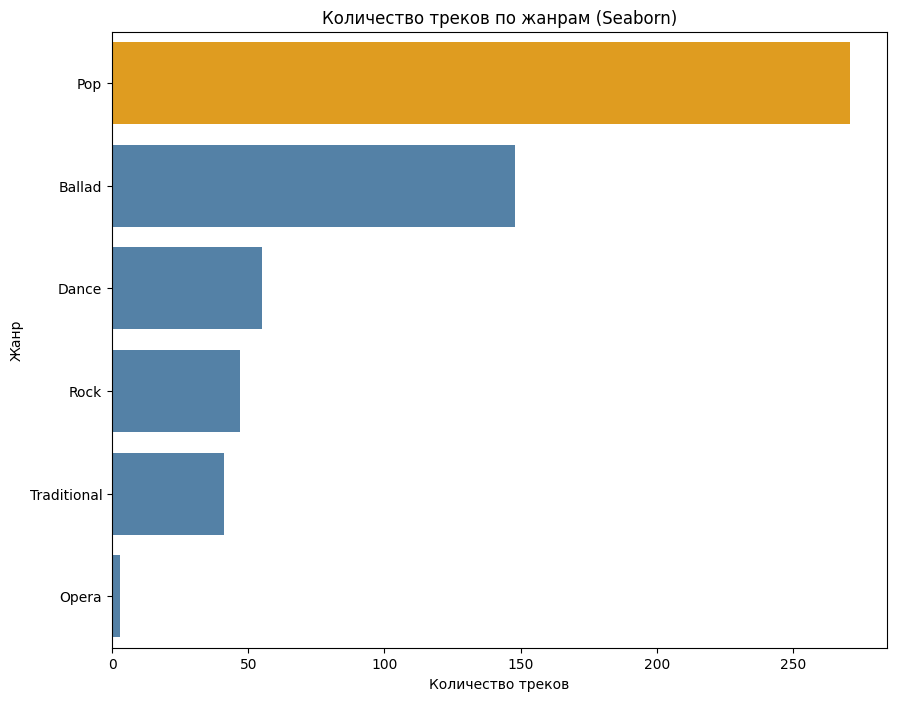

In [ ]:
style_counts = df['style'].value_counts().reset_index()
style_counts.columns = ['style', 'count']
top_style = style_counts.iloc[0]['style']

plt.figure(figsize=(10, 8))
sns.barplot(
    data=style_counts,
    y='style', x='count',
    order=style_counts['style'],
    palette=[('orange' if s == top_style else 'steelblue') for s in style_counts['style']]
)
plt.title("Количество треков по жанрам (Seaborn)")
plt.xlabel("Количество треков")
plt.ylabel("Жанр")
plt.show()

style_counts['is_top'] = np.where(style_counts['style'] == top_style, 'Топ-жанр', 'Остальные')
fig = px.bar(
    style_counts,
    y='style', x='count',
    color='is_top',
    orientation='h',
    title="Количество треков по жанрам (Plotly)"
)
fig.update_layout(xaxis_title="Количество треков", yaxis_title="Жанр")
fig.show()


## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

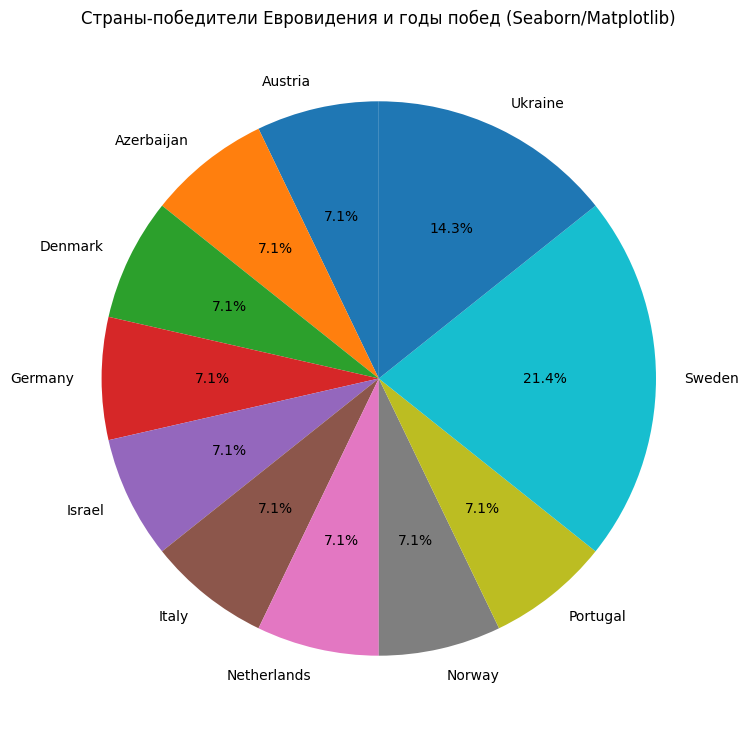

Годы побед по странам:


,country,years_str,wins_count
9,Sweden,"2012, 2015, 2023",3
10,Ukraine,"2016, 2022",2
0,Austria,2014,1
2,Denmark,2013,1
1,Azerbaijan,2011,1
3,Germany,2010,1
4,Israel,2018,1
6,Netherlands,2019,1
5,Italy,2021,1
8,Portugal,2017,1


In [ ]:
winners = df[df['final_place'] == 1].copy()

wins = winners.groupby('country')['year'].apply(lambda x: sorted(x.unique())).reset_index()
wins['wins_count'] = wins['year'].apply(len)
wins['years_str'] = wins['year'].apply(lambda ys: ", ".join(map(str, ys)))

# Seaborn pie через matplotlib
plt.figure(figsize=(9, 9))
plt.pie(
    wins['wins_count'],
    labels=wins['country'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Страны-победители Евровидения и годы побед (Seaborn/Matplotlib)")
plt.show()

# Plotly pie (удобнее показать годы в hover + подписи)
fig = px.pie(
    wins,
    names='country',
    values='wins_count',
    title="Страны-победители Евровидения и годы побед (Plotly)",
    hover_data={'years_str': True, 'wins_count': True}
)
fig.update_traces(textinfo='percent+label')
fig.show()

print("Годы побед по странам:")
display(wins[['country','years_str','wins_count']].sort_values('wins_count', ascending=False))


## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

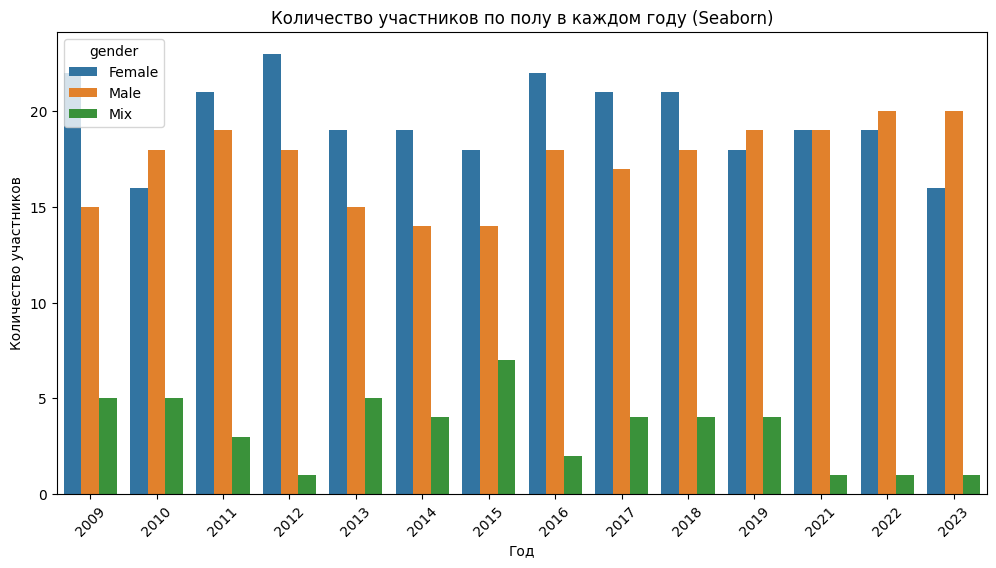

In [ ]:
gender_year = (
    df.groupby(['year','gender'])
      .size()
      .reset_index(name='count')
)

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_year, x='year', y='count', hue='gender')
plt.title("Количество участников по полу в каждом году (Seaborn)")
plt.xlabel("Год")
plt.ylabel("Количество участников")
plt.xticks(rotation=45)
plt.show()

fig = px.bar(
    gender_year,
    x='year', y='count',
    color='gender',
    barmode='group',
    title="Количество участников по полу в каждом году (Plotly)"
)
fig.update_layout(xaxis_title="Год", yaxis_title="Количество участников")
fig.show()


## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

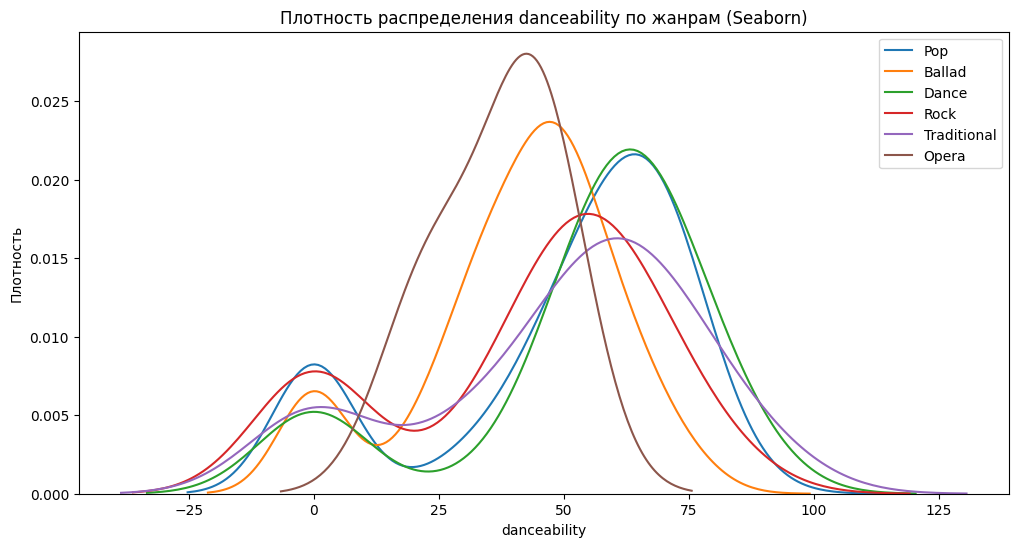

In [ ]:
top_styles = df['style'].value_counts().head(6).index
df_top = df[df['style'].isin(top_styles)].copy()

plt.figure(figsize=(12, 6))
for st in top_styles:
    sns.kdeplot(data=df_top[df_top['style'] == st], x='danceability', label=st, fill=False)
plt.title("Плотность распределения danceability по жанрам (Seaborn)")
plt.xlabel("danceability")
plt.ylabel("Плотность")
plt.legend()
plt.show()

fig = px.density_contour(
    df_top,
    x='danceability',
    color='style',
    title="Плотность распределения danceability по жанрам (Plotly)"
)
fig.update_layout(xaxis_title="danceability", yaxis_title="Плотность")
fig.show()


## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

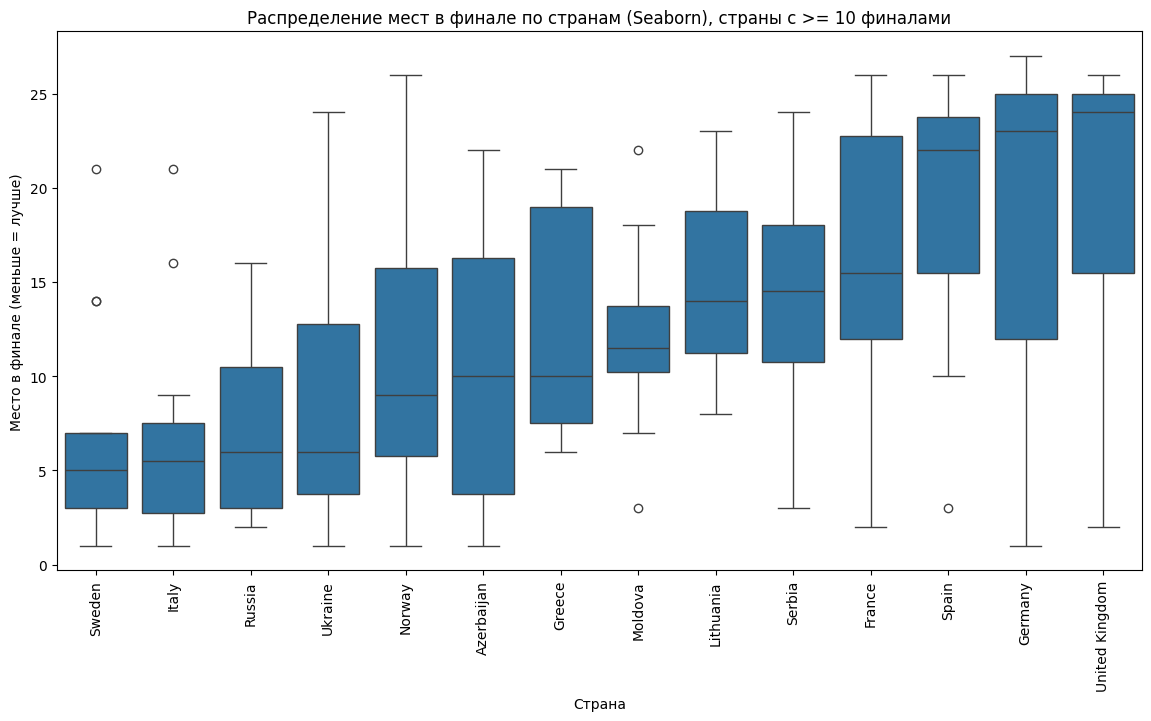

Страны с похожими результатами (группировка по округлённой медиане):


,country,median,iqr,mean,std,n,median_round
11,Sweden,5.0,4.00,6.461538,6.132093,13,5.0
4,Italy,5.5,4.75,6.833333,6.012613,12,6.0
8,Russia,6.0,7.50,6.900000,4.748099,10,6.0
12,Ukraine,6.0,9.00,8.666667,7.113794,12,6.0
7,Norway,9.0,10.00,10.916667,7.391129,12,9.0
3,Greece,10.0,11.50,12.909091,6.171783,11,10.0
0,Azerbaijan,10.0,12.50,10.333333,7.426407,12,10.0
6,Moldova,11.5,3.50,12.100000,5.300943,10,12.0
9,Serbia,14.5,7.25,13.900000,6.471304,10,14.0
5,Lithuania,14.0,7.50,15.000000,5.270463,10,14.0


In [ ]:
df_fp = df.dropna(subset=['final_place']).copy()
df_fp['final_place'] = pd.to_numeric(df_fp['final_place'], errors='coerce')
df_fp = df_fp.dropna(subset=['final_place'])

min_n = 10
top_countries = df_fp['country'].value_counts()
countries_use = top_countries[top_countries >= min_n].index
df_c = df_fp[df_fp['country'].isin(countries_use)].copy()

# Для упорядочивания по медиане
order = df_c.groupby('country')['final_place'].median().sort_values().index

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_c, x='country', y='final_place', order=order)
plt.title(f"Распределение мест в финале по странам (Seaborn), страны с >= {min_n} финалами")
plt.xlabel("Страна")
plt.ylabel("Место в финале (меньше = лучше)")
plt.xticks(rotation=90)
plt.show()

fig = px.box(
    df_c,
    x='country', y='final_place',
    category_orders={'country': list(order)},
    title=f"Распределение мест в финале по странам (Plotly), страны с >= {min_n} финалами"
)
fig.update_layout(xaxis_title="Страна", yaxis_title="Место в финале (меньше = лучше)")
fig.show()

# Автоматический поиск "похожих" стран: по медиане и IQR
def iqr(s):
    return s.quantile(0.75) - s.quantile(0.25)

stats = df_c.groupby('country')['final_place'].agg(median='median', iqr=iqr, mean='mean', std='std', n='size').reset_index()
stats['median_round'] = stats['median'].round(0)

print("Страны с похожими результатами (группировка по округлённой медиане):")
display(stats.sort_values(['median_round','iqr']).head(20))


## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

In [ ]:
finals = df.dropna(subset=['final_place']).copy()
finals_count = finals.groupby('country').size().reset_index(name='finals_count')

fig = px.choropleth(
    finals_count,
    locations='country',
    locationmode='country names',
    color='finals_count',
    title="Сколько раз каждая страна проходила в финал (Plotly)",
)
fig.update_layout(coloraxis_colorbar_title="Кол-во финалов")
fig.show()


## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [ ]:
df_fp = df.dropna(subset=['final_place']).copy()
df_fp['final_place'] = pd.to_numeric(df_fp['final_place'], errors='coerce')
df_fp = df_fp.dropna(subset=['final_place'])

top3 = df_fp[df_fp['final_place'].isin([1,2,3])]
top3_count = top3.groupby('country').size().reset_index(name='top3_count')

fig = px.treemap(
    top3_count,
    path=['country'],
    values='top3_count',
    title="Сколько раз каждая страна входила в топ-3 (Plotly Treemap)"
)
fig.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

In [ ]:
# Выполнение индивидуального задания №2
artists = df.dropna(subset=['artist_name']).copy()

artist_places = (
    artists.groupby('artist_name')
           .agg(times=('artist_name','size'),
                places=('final_place', lambda x: sorted(pd.to_numeric(x, errors='coerce').dropna().astype(int).unique().tolist())))
           .reset_index()
)

multi = artist_places[artist_places['times'] > 1].copy()
multi['places_str'] = multi['places'].apply(lambda x: ", ".join(map(str,x)) if len(x) else "нет данных")

fig = px.pie(
    multi.sort_values('times', ascending=False).head(15),
    names='artist_name',
    values='times',
    title="Исполнители, участвовавшие больше 1 раза (топ-15), и их места (Plotly)",
    hover_data={'places_str': True, 'times': True}
)
fig.update_traces(textinfo='percent+label')
fig.show()

display(multi.sort_values('times', ascending=False).head(30)[['artist_name','times','places_str']])


,artist_name,times,places_str
517,Valentina Monetta,3,24
14,Alexander Rybak,2,"1, 15"
232,Jedward,2,"8, 19"
124,Donny Montell,2,"9, 14"
239,Joci Papai,2,8
253,Kaliopi,2,13
294,Loreen,2,1
280,Lena,2,"1, 10"
319,Marco Mengoni,2,"4, 7"
404,Poli Genova,2,4


# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).